In [19]:
from keras import layers
from keras import models

In [20]:
################
### SETTINGS ###
################

# Data directoriy
base_dir = ".\\data\\multi4"
train_dir = base_dir + "\\train"
validation_dir = base_dir + "\\validation"
test_dir = base_dir + "\\test"

In [21]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',
                       input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))

#model.add(layers.Dense(1,activation='sigmoid'))
model.add(layers.Dense(4,activation='softmax'))

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [23]:
from keras import optimizers
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['acc'])

In [24]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size = 20,
    class_mode ='sparse'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size = 20,
    class_mode ='sparse'
    #class_mode ='categorical'
    
)


Found 2658 images belonging to 4 classes.
Found 1510 images belonging to 4 classes.


In [25]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=30,
                             epochs=7,
                             validation_data=validation_generator,
                              validation_steps=40
                             )

Epoch 1/7
30/30 [==============================] - 74s 2s/step - loss: 1.5386 - acc: 0.3700 - val_loss: 1.1273 - val_acc: 0.4463
Epoch 2/7
29/30 [============================>.] - ETA: 1s - loss: 1.0902 - acc: 0.4534

C:\Users\yueki\Anaconda3\lib\site-packages\PIL\Image.py:888: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


30/30 [==============================] - 66s 2s/step - loss: 1.0876 - acc: 0.4483 - val_loss: 0.9731 - val_acc: 0.5304
Epoch 3/7
30/30 [==============================] - 67s 2s/step - loss: 0.9413 - acc: 0.4883 - val_loss: 0.8335 - val_acc: 0.6162
Epoch 4/7
30/30 [==============================] - 75s 3s/step - loss: 0.8086 - acc: 0.5667 - val_loss: 0.8844 - val_acc: 0.5481
Epoch 5/7
30/30 [==============================] - 75s 2s/step - loss: 0.7836 - acc: 0.5652 - val_loss: 0.8479 - val_acc: 0.5650
Epoch 6/7
30/30 [==============================] - 91s 3s/step - loss: 0.8075 - acc: 0.5617 - val_loss: 0.8125 - val_acc: 0.5848
Epoch 7/7
30/30 [==============================] - 79s 3s/step - loss: 0.7588 - acc: 0.6383 - val_loss: 1.0595 - val_acc: 0.4837


In [26]:
model.save('cats_and_dogs_small_1_20201121_2.h5')

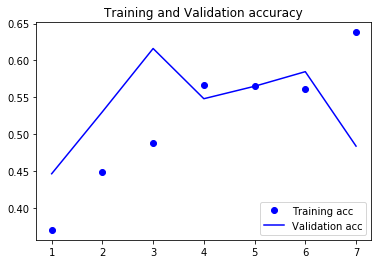

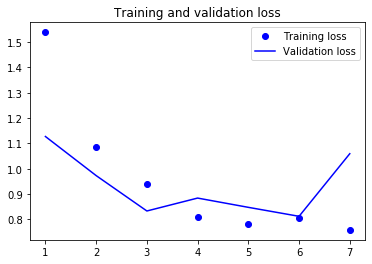

In [27]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1 , len(acc) + 1)

# plot ratio
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss,'bo', label='Training loss')
plt.plot(epochs, val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [28]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='sparse')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1400 images belonging to 4 classes.
test acc: 0.5050000017881393


In [39]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
predict_img_path = "./sample_data\\kitori_001.png"
#predict_img_path = "./sample_data\\kaido.jpg"
predict_img = image.load_img(predict_img_path,target_size=(150,150))
x = image.img_to_array(predict_img)
x = np.expand_dims(x,axis=0)
preds = model.predict(x)
print(preds)

[[0. 0. 0. 1.]]
